In [1]:
%reload_ext autoreload
%autoreload 2

from fastai import *
from fastai.vision import *

In [2]:
import fastai.vision

In [3]:
from fastai.vision.data import *

# Dogs and cats

## Resnet 34

In [4]:
path = untar_data(URLs.DOGS)
path

PosixPath('/data/anaconda3/envs/fastaiv1/lib/python3.7/site-packages/fastai/../data/dogscats')

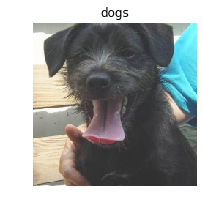

In [5]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), tfms=imagenet_norm, size=224)
img,label = data.valid_ds[-1]
img.show(title=data.classes[label])

In [7]:
learn = ConvLearner(data, tvm.resnet34, metrics=accuracy)
learn.fit_one_cycle(1)

Total time: 02:17
epoch  train loss  valid loss  accuracy
0      0.051183    0.024097    0.992500  (02:17)



In [8]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

Total time: 12:02
epoch  train loss  valid loss  accuracy
0      0.042432    0.024118    0.992500  (02:00)
1      0.028686    0.023231    0.991500  (01:59)
2      0.022677    0.020428    0.994000  (01:59)
3      0.013976    0.015993    0.993500  (01:59)
4      0.007841    0.016588    0.994000  (02:00)
5      0.006165    0.014725    0.993500  (02:02)



In [9]:
accuracy(*learn.TTA())

Total time: 01:33



tensor(0.9950)

## rn50

In [10]:
learn = ConvLearner(data, tvm.resnet50, metrics=accuracy)
learn.fit_one_cycle(6)

RuntimeError: CUDA error: out of memory

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

In [ ]:
accuracy(*learn.TTA())